In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import json

In [2]:
DATA_PATH = "data/"
ANSWERS_PATH = DATA_PATH + "answers.csv"

In [3]:
ANSWERS_COLUMNS = ["id","fake/natural", "stagnant/lively", "inert/interactive", 
                   "unconscious/conscious", "incompetent/competent", 
                   "unintelligent/intelligent", "mechanical/organic", 
                   "unresponsive/responsive", "foolish/sensible", 
                   "ignorant/knowledgeable", "machinelike/humanlike", 
                   "artificial/lifelike", "dead/alive", "unpleasant/pleasant",
                   "ridig/smooth", "dislike/like", "irresponsible/responsible",
                   "awful/nice", "unfriendly/friendly", "unkind/kind"]
ANTHROPOMORPHISM_COLUMNS = ["fake/natural", "machinelike/humanlike", 
                            "unconscious/conscious", "artificial/lifelike",
                            "ridig/smooth"]
ANIMACY_COLUMNS = ["dead/alive", "stagnant/lively", "mechanical/organic",
                   "inert/interactive", "artificial/lifelike",
                   "unresponsive/responsive"]
LIKEABILITY_COLUMNS = ["dislike/like", "unfriendly/friendly",
                       "unkind/kind", "unpleasant/pleasant",
                       "awful/nice"]
INTELLIGENCE_COLUMNS = ["incompetent/competent", "ignorant/knowledgeable",
                        "irresponsible/responsible", "unintelligent/intelligent",
                        "foolish/sensible"]
IMPRESSIONS = {"Anthropomorphism": ANTHROPOMORPHISM_COLUMNS, 
               "Animacy":ANIMACY_COLUMNS, 
               "Likeability":LIKEABILITY_COLUMNS,
               "Intelligence":INTELLIGENCE_COLUMNS}

FEATURES = ['smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle',
       'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker',
       'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention',
       'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden', 'cheekRaise',
       'lipStretch']

### Methods for gathering the data in nice format

In [4]:
def collect_answers(aggregate=False):
    """
    Description: 
    Collects all answers (stored in one answers.csv file)
                 from each surveys (one per video)
                 
    Arguments: 
    aggregate -- if true take the mean of the answers per impressions
               type, if false returns all answers
               
    Outputs: 
    A dataframe where each row represents one survey (= one video)
             and each columns are the answers to that survey
    """
    answers = pd.read_csv(ANSWERS_PATH, names = ANSWERS_COLUMNS, header=0)
    answers.set_index("id", inplace=True)
    
    if aggregate:
        for impression in IMPRESSIONS:
            answers[impression] = answers[IMPRESSIONS[impression]].mean(axis=1)
        return answers[IMPRESSIONS.keys()]
    else:
        return answers
    
def collect_features(identifier, aggregate=None):
    """
    Description: Collects the features over time of one processed video 
                 (stored in one json file)
                 
    Arguments: 
    aggregate -- if not none, aggregates each features over time 
               either by taking the mean or by taking the max
    identifier -- the identifier of the json file
    
    Outputs: 
    If aggregate!=None return a single row containing the 
             aggregated features over time, otherwise each row represents
             a timestamp and each column is a feature
    """
    with open(DATA_PATH + "/features{0}.json".format(identifier)) as json_file:
        data = json.load(json_file)
    #print(json.dumps(data, indent=4, sort_keys=True))
    #appearance = pd.DataFrame(data["data"]["appearance"])
    #appearance["time"] = data["timestamps"]
    #appearance.set_index("time", inplace=True)
    expressions = pd.DataFrame(data["data"]["expressions"])
    expressions["time"] = data["timestamps"]
    expressions.set_index("time", inplace=True)
    if aggregate == "mean":
        ans = pd.DataFrame(expressions.mean(axis=0)).transpose() 
        ans["id"] = identifier
        ans.set_index("id", inplace=True)
        return ans
    if aggregate == "max":
        ans = pd.DataFrame(expressions.max(axis=0)).transpose() 
        ans["id"] = identifier
        ans.set_index("id", inplace=True)
        return ans
    else:
        return expressions
    
def collect_all_features(aggregate="mean"):
    """
    Description: 
    Collects all features (stored in all the json files)
                 from each processed videos and group them in a dataframe.
                 
    Arguments: 
    aggregate -- the way we aggregate the facial features over
               time, either mean or max
               
    Outputs: 
    A dataframe where each row represents a processed 
             video and each columns is a facial feature recorded during that video.
    """
    answers = collect_answers()
    answers.index = ["1","2","3"] #wont be needed aftewards because the id will be part of the answers of the survey
    identifiers = answers.index.values
    ans = pd.DataFrame()
    for id_ in identifiers:
        ans = pd.concat([ans, collect_features(id_, aggregate=aggregate)])
    return ans

### Methods for displaying basing statistic of the data

In [23]:
def plot_feature_evolution(feature_name, indices):
    """
    Description: 
    Plot the evolution of a given feature
    over time for the given experiments indices
    
    Arguments: 
    feature_name -- which feature to plot must be an element of the FEATURES list
    indicies -- indicies of the experiment we want to plot
    """
    plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

    for i in indices:
        time_serie = collect_features(i)[feature_name]
        plt.plot(time_serie)
    plt.ylabel("{0} level [%]".format(feature_name))
    plt.xlabel("time [s]")
    plt.legend(indices)
    plt.title("{0} level evolution over time".format(feature_name))
    plt.show()

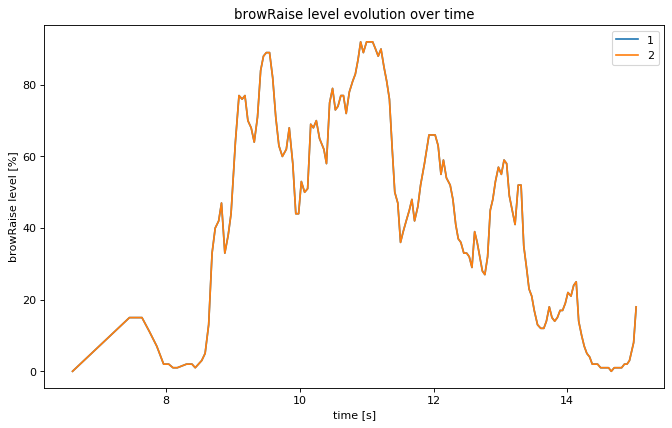

In [24]:
plot_feature_evolution("browRaise", ["1","2"])

In [5]:
X1 = np.random.normal(10,3, size=(100,10))
X2 = np.random.normal(-10,2, size=(100,10))
X3 = np.random.normal(0,3, size=(100,10))
X = np.concatenate((X1,X2,X3))

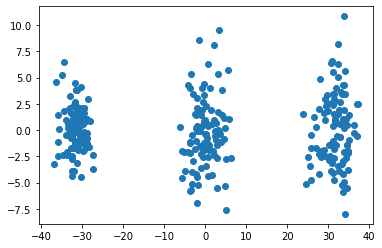

In [6]:
pca = PCA(n_components=2)
y = pca.fit_transform(X)
plt.scatter(y[:,0],y[:,1])

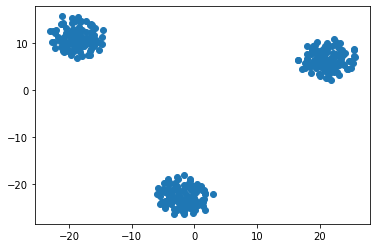

In [7]:
y_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(y_tsne[:,0],y_tsne[:,1])

### Hopefully the answers will form three clusters, one for each type of videos

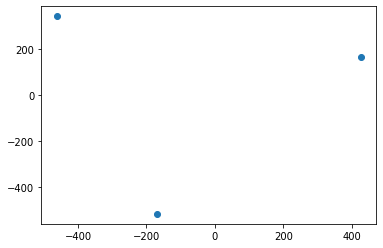

In [25]:
answers = collect_answers(aggregate=False)
X = answers.values
y_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(y_tsne[:,0],y_tsne[:,1])

### Hopefully the aggregated features over time will form three clusters, one for each type of videos

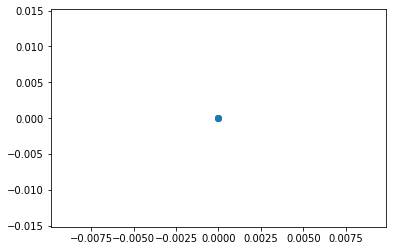

In [31]:
all_features = collect_all_features()
X = all_features.values
y_tsne = PCA(n_components=2).fit_transform(X)
plt.scatter(y_tsne[:,0],y_tsne[:,1])

# Example

In [9]:
answers = collect_answers(aggregate=False)
answers.index = ["1","2","3"] #wont be needed aftewards because the id will be part of the answers of the survey
answers.head()

,fake/natural,stagnant/lively,inert/interactive,unconscious/conscious,incompetent/competent,unintelligent/intelligent,mechanical/organic,unresponsive/responsive,foolish/sensible,ignorant/knowledgeable,machinelike/humanlike,artificial/lifelike,dead/alive,unpleasant/pleasant,ridig/smooth,dislike/like,irresponsible/responsible,awful/nice,unfriendly/friendly,unkind/kind
1,2,3,3,4,1,2,3,3,1,3,5,4,3,2,1,2,5,4,3,3
2,3,4,3,1,2,3,5,5,3,3,3,3,4,3,4,3,3,2,3,3
3,2,1,2,3,4,4,3,3,2,2,2,5,4,3,4,3,3,3,2,2


In [5]:
answers = collect_answers(aggregate=True)
answers.index = ["1","2","3"] #wont be needed aftewards because the id will be part of the answers of the survey
answers.head()

,Anthropomorphism,Animacy,Likeability,Intelligence
1,3.2,3.166667,2.8,2.4
2,2.8,4.000000,2.8,2.8
3,3.2,3.000000,2.6,3.0


In [6]:
features1agg = collect_features("1", aggregate = "mean")
features1agg.head()

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,mouthOpen,smirk,eyeClosure,attention,lidTighten,jawDrop,dimpler,eyeWiden,cheekRaise,lipStretch
id,,,,,,,,,,,,,,,,,,,,,
1,22.751553,7.770186,42.024845,0.0,0.012422,0.049689,11.465839,0.236025,0.0,8.838509,...,0.0,14.21118,0.21118,98.391304,0.055901,0.614907,42.826087,37.409938,7.130435,33.074534


In [26]:
features1 = collect_features("1")
features1.head()

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,mouthOpen,smirk,eyeClosure,attention,lidTighten,jawDrop,dimpler,eyeWiden,cheekRaise,lipStretch
time,,,,,,,,,,,,,,,,,,,,,
6.597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,93,0,0,0,0,0,0
7.449,0,0,15,0,0,0,0,0,0,0,...,0,0,0,97,0,1,0,0,0,0
7.636,0,2,15,0,0,0,0,0,0,0,...,0,0,0,98,0,1,0,0,0,0
7.750,0,1,11,0,0,0,0,0,0,0,...,0,0,0,98,0,0,0,0,0,0
7.858,0,1,7,0,0,0,0,0,0,0,...,0,0,0,98,0,0,0,0,0,0


In [8]:
all_features = collect_all_features()
all_features.head()

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,mouthOpen,smirk,eyeClosure,attention,lidTighten,jawDrop,dimpler,eyeWiden,cheekRaise,lipStretch
id,,,,,,,,,,,,,,,,,,,,,
1,22.751553,7.770186,42.024845,0.0,0.012422,0.049689,11.465839,0.236025,0.0,8.838509,...,0.0,14.21118,0.21118,98.391304,0.055901,0.614907,42.826087,37.409938,7.130435,33.074534
2,22.751553,7.770186,42.024845,0.0,0.012422,0.049689,11.465839,0.236025,0.0,8.838509,...,0.0,14.21118,0.21118,98.391304,0.055901,0.614907,42.826087,37.409938,7.130435,33.074534
3,22.751553,7.770186,42.024845,0.0,0.012422,0.049689,11.465839,0.236025,0.0,8.838509,...,0.0,14.21118,0.21118,98.391304,0.055901,0.614907,42.826087,37.409938,7.130435,33.074534
